In [7]:
# Implement decision tree classification with Titanic dataset (predict Survived) 
#install.packages("rpart.plot")
library(rpart.plot)

In [8]:
library(randomForest)

In [16]:
# read the csv file for trin and test data of Titanic dataset
titanic_train <- read.csv("C://Users//Mayur//Documents//Advance Data Science//Assignments_SDas//Assignment_3//TitanicDS_prediction//Titanic train.csv", header = TRUE, sep = ",")
summary(titanic_train)

# Summary gives us idea about statistics of data

  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

In [17]:
titanic_test <- read.csv("C://Users//Mayur//Documents//Advance Data Science//Assignments_SDas//Assignment_3//TitanicDS_prediction//Titanic test.csv", header = TRUE, sep = ",")
summary(titanic_test)

  PassengerId         Pclass     
 Min.   : 892.0   Min.   :1.000  
 1st Qu.: 996.2   1st Qu.:1.000  
 Median :1100.5   Median :3.000  
 Mean   :1100.5   Mean   :2.266  
 3rd Qu.:1204.8   3rd Qu.:3.000  
 Max.   :1309.0   Max.   :3.000  
                                 
                                        Name         Sex           Age       
 Abbott, Master. Eugene Joseph            :  1   female:152   Min.   : 0.17  
 Abelseth, Miss. Karen Marie              :  1   male  :266   1st Qu.:21.00  
 Abelseth, Mr. Olaus Jorgensen            :  1                Median :27.00  
 Abrahamsson, Mr. Abraham August Johannes :  1                Mean   :30.27  
 Abrahim, Mrs. Joseph (Sophie Halaut Easu):  1                3rd Qu.:39.00  
 Aks, Master. Philip Frank                :  1                Max.   :76.00  
 (Other)                                  :412                NA's   :86     
     SibSp            Parch             Ticket         Fare        
 Min.   :0.0000   Min.   :0.0000   P

In [18]:
# dataset in string format

str(titanic_train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [19]:
#to check last rows of datasets

tail(titanic_train)

PassengerId Survived Pclass Name                                     Sex   
886 886         0        3      Rice, Mrs. William (Margaret Norton)     female
887 887         0        2      Montvila, Rev. Juozas                    male  
888 888         1        1      Graham, Miss. Margaret Edith             female
889 889         0        3      Johnston, Miss. Catherine Helen "Carrie" female
890 890         1        1      Behr, Mr. Karl Howell                    male  
891 891         0        3      Dooley, Mr. Patrick                      male  
    Age SibSp Parch Ticket     Fare   Cabin Embarked
886 39  0     5     382652     29.125       Q       
887 27  0     0     211536     13.000       S       
888 19  0     0     112053     30.000 B42   S       
889 NA  1     2     W./C. 6607 23.450       S       
890 26  0     0     111369     30.000 C148  C       
891 32  0     0     370376      7.750       Q

In [99]:
# In the some of rows Age is NA, so there are 2 options either we can remove the NA rows or We can predict the value of Age
#we will go for prediction of Age for NA values

predicted_age <- rpart(Age ~ Pclass + Sex + SibSp + Parch + Fare + Embarked,
                       data = titanic_train[!is.na(titanic_train$Age),], method = "anova")

#here we used method = "anova", which is used for continious data
titanic_train$Age[is.na(titanic_train$Age)] <- predict(predicted_age, titanic_train[is.na(titanic_train$Age),])
tail(titanic_train)


#cwe got the Age for PassengerID 889 is 21.053

PassengerId Survived Pclass Name                                     Sex   
886 886         0        3      Rice, Mrs. William (Margaret Norton)     female
887 887         0        2      Montvila, Rev. Juozas                    male  
888 888         1        1      Graham, Miss. Margaret Edith             female
889 889         0        3      Johnston, Miss. Catherine Helen "Carrie" female
890 890         1        1      Behr, Mr. Karl Howell                    male  
891 891         0        3      Dooley, Mr. Patrick                      male  
    Age      SibSp Parch Ticket     Fare   Cabin Embarked
886 39.00000 0     5     382652     29.125       Q       
887 27.00000 0     0     211536     13.000       S       
888 19.00000 0     0     112053     30.000 B42   S       
889 21.05398 1     2     W./C. 6607 23.450       S       
890 26.00000 0     0     111369     30.000 C148  C       
891 32.00000 0     0     370376      7.750       Q

In [20]:
#Use ggplot() to plot the distribution of sexes within the classes of the ship.

require(ggplot2)

Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin



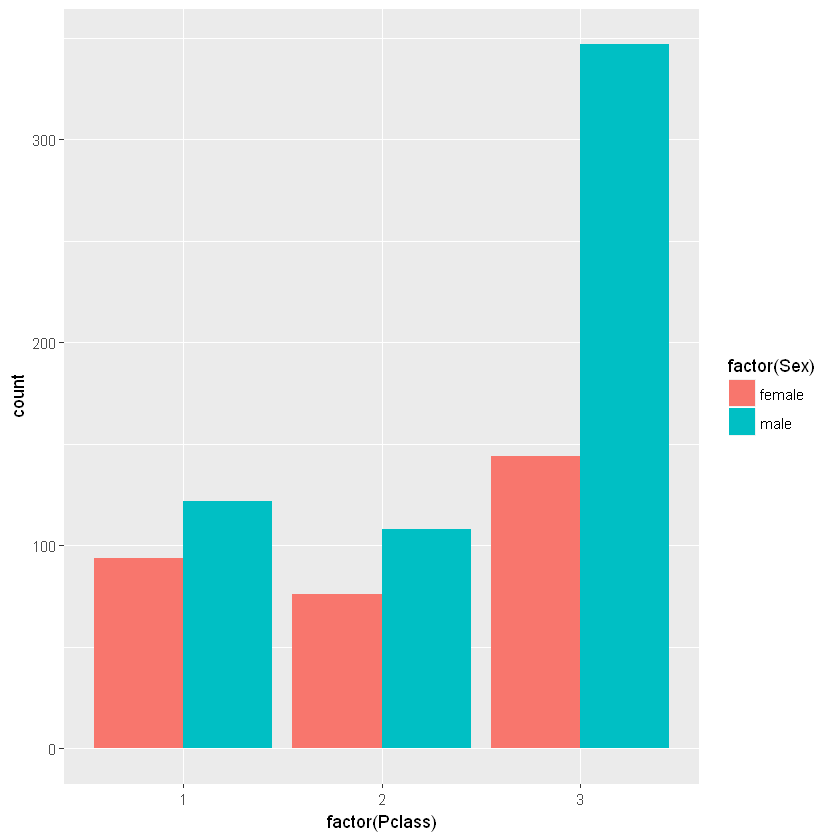

In [33]:
# used ggplot to display the male female counts as per Pclass
ggplot(titanic_train,aes(x=factor(Pclass),fill=factor(Sex))) + geom_bar(position="dodge")

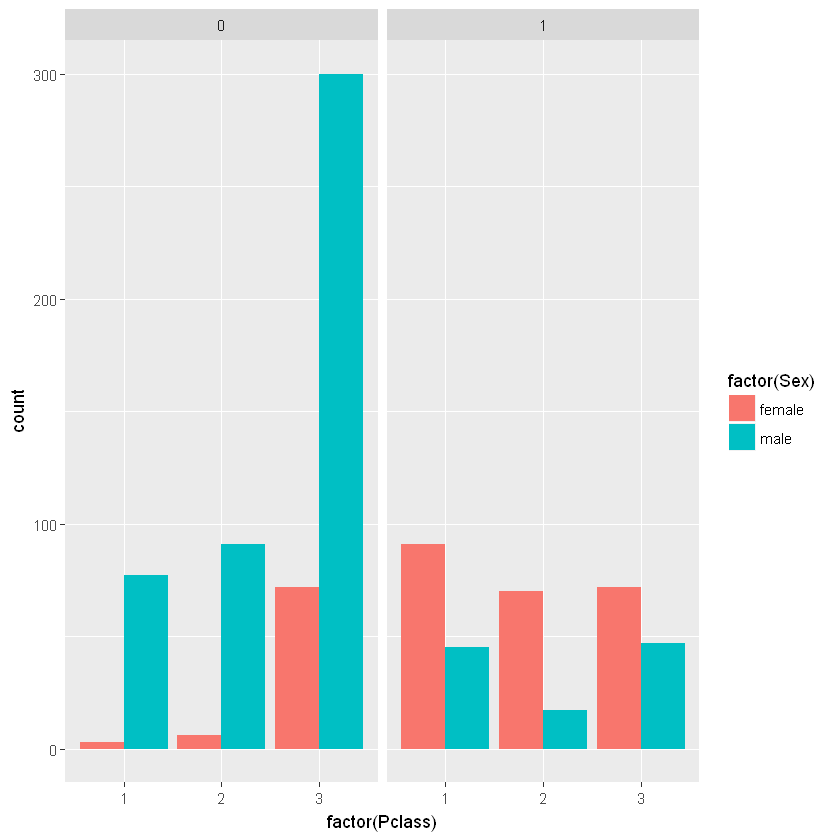

In [35]:
# to see the survived plot (0 - non Survived, 1 - Survived) with respect to Count of male-Female passenger and Pclass
ggplot(titanic_train,aes(x=factor(Pclass),fill=factor(Sex))) + geom_bar(position="dodge") + facet_grid(". ~ Survived")

In [39]:
#Use ggplot() to estimate your chances of survival based on your age from the distribution of sexes within the classes of the ship.
# used scatter plot to get more clear idea
pos.j <- position_jitter(0.5,0)
pos.j

<ggproto object: Class PositionJitter, Position>
    compute_layer: function
    compute_panel: function
    height: 0
    required_aes: x y
    setup_data: function
    setup_params: function
    width: 0.5
    super:  <ggproto object: Class PositionJitter, Position>

Warning message:
"Removed 177 rows containing missing values (geom_point)."

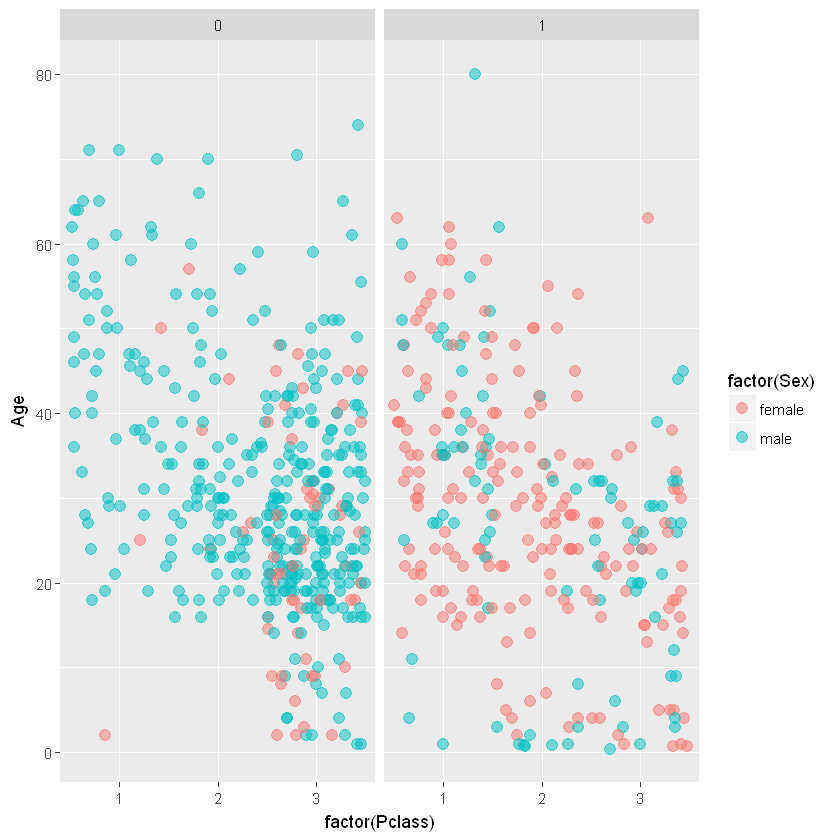

In [45]:
ggplot(titanic_train, aes(x=factor(Pclass),y=Age, col=factor(Sex))) + 
geom_jitter(size=3, alpha=0.5, position = pos.j) + 
facet_grid(". ~ Survived")

In [46]:
str(titanic_train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [47]:
#table representation of Survived
table(titanic_train$Survived)


  0   1 
549 342 

In [48]:
# probabilty of survived passenger
prop.table(table(titanic_train$Survived))


        0         1 
0.6161616 0.3838384 

In [49]:
table(titanic_train$Sex, titanic_train$Survived)

        
           0   1
  female  81 233
  male   468 109

In [52]:
prop.table(table(titanic_train$Sex, titanic_train$Survived),1)

        
                 0         1
  female 0.2579618 0.7420382
  male   0.8110919 0.1889081

In [54]:
#create the temporary dataset of testing dataset
test <- titanic_test

In [55]:
#creat the new column of Survived 

test$Survived <- 0

In [56]:
#as per the obseravation of graphs we found that Female's Survival rate is more so assign 1 to for Females

test$Survived[test$Sex == "Female"] <- 1

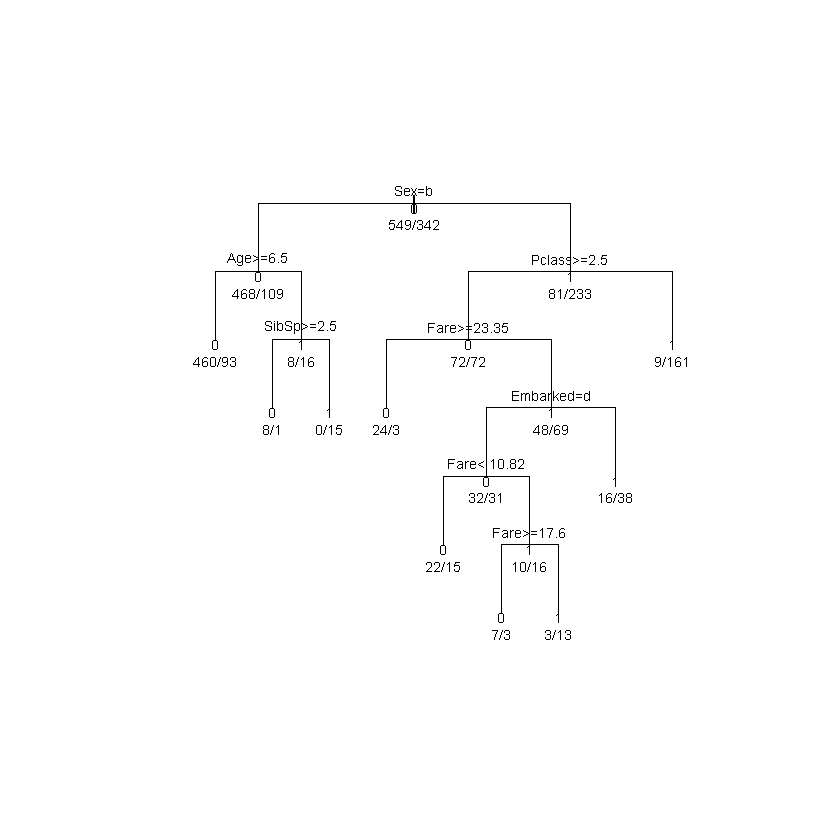

In [79]:
#Classification and regression trees (as described by Brieman, Freidman, Olshen, and Stone) can be generated through the rpart package. 

my_tree_two <- rpart(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked, data = titanic_train, method = "class")
plot(my_tree_two, uniform=TRUE,margin=0.2)
text(my_tree_two, use.n=TRUE, all=TRUE, cex=.7)

#plot(my_tree_two)

In [106]:
#predicting the Survived of test dataset 

my_prediction <- predict(my_tree_two, titanic_test, type= "class")

# creating the data frame
titanic_test[, "Survived"] <- my_prediction
#predict_table <- data.frame(PassangerId = titanic_test$PassengerId, my_prediction)

tail(titanic_test)
nrow(predict_table) ; ncol(predict_table)

PassengerId Pclass Name                           Sex    Age  SibSp Parch
413 1304        3      Henriksson, Miss. Jenny Lovisa female 28.0 0     0    
414 1305        3      Spector, Mr. Woolf             male     NA 0     0    
415 1306        1      Oliva y Ocana, Dona. Fermina   female 39.0 0     0    
416 1307        3      Saether, Mr. Simon Sivertsen   male   38.5 0     0    
417 1308        3      Ware, Mr. Frederick            male     NA 0     0    
418 1309        3      Peter, Master. Michael J       male     NA 1     1    
    Ticket             Fare     Cabin Embarked Survived
413 347086               7.7750       S        0       
414 A.5. 3236            8.0500       S        0       
415 PC 17758           108.9000 C105  C        1       
416 SOTON/O.Q. 3101262   7.2500       S        0       
417 359309               8.0500       S        0       
418 2668                22.3583       C        0

[1] 418

[1] 2

In [107]:
# Write your solution away to a csv file with the name my_solution.csv
#merge(x = titanic_test, y = predict_table, by.x="PassengerId", by.y="PassengerId", Fill = NA )

write.csv(titanic_test, file = "C://Users//Mayur//Documents//Advance Data Science//Assignments_SDas//Assignment_3//TitanicDS_prediction//Titanic test.csv", row.names = FALSE)

#"C://Users//Mayur//Documents//Advance Data Science//Assignments_SDas//Assignment_3//TitanicDS_prediction//Titanic test.csv", header = TRUE, sep = ",")

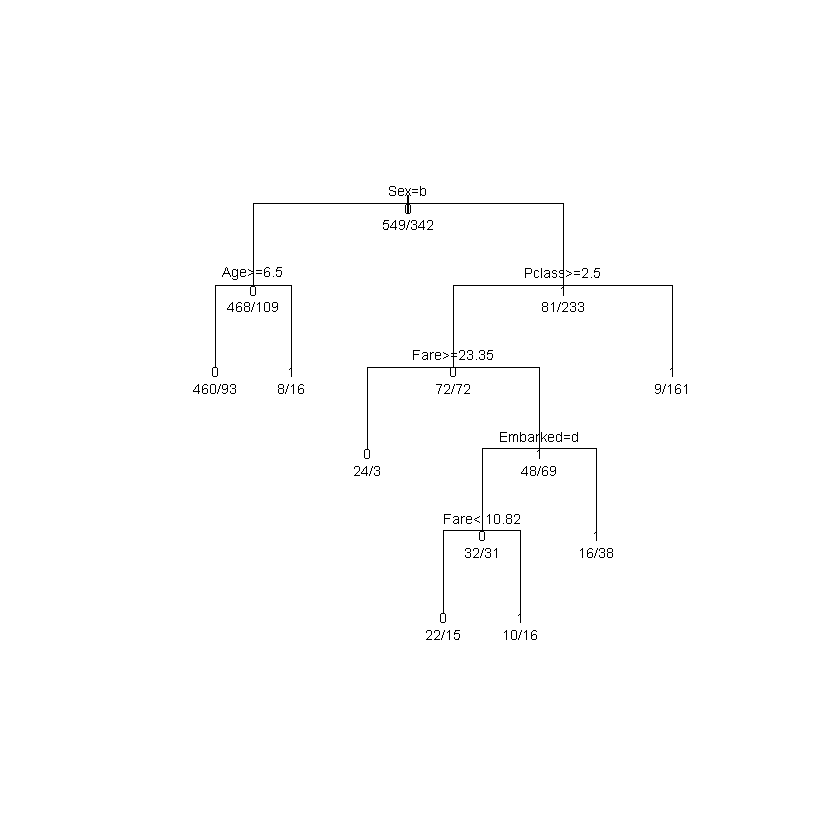

In [86]:
# create the new model as per control parameters to split
my_tree_3 <- rpart(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked, data = titanic_train, method = "class", control=rpart.control(minsplit =50, cp=0))
plot(my_tree_3, uniform=TRUE,margin=0.2)
text(my_tree_3, use.n=TRUE, all=TRUE, cex=.7)

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"


Call:
 randomForest(formula = Survived ~ Pclass + Sex + Age + SibSp +      Parch + Fare + Embarked, data = titanic_train, importance = TRUE,      ntree = 1000) 
               Type of random forest: regression
                     Number of trees: 1000
No. of variables tried at each split: 2

          Mean of squared residuals: 0.1246375
                    % Var explained: 47.3

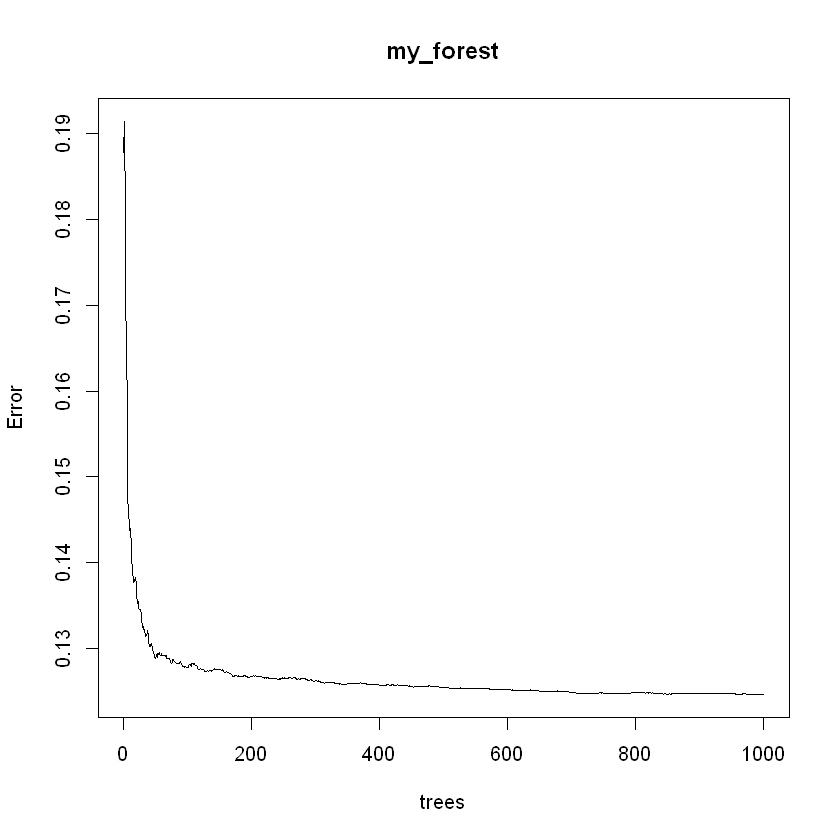

In [100]:
#creating the random forest model by creating 1000 trees, As no. of trees goes more the Error of model will go down
#Check the graph also
my_forest <- randomForest(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked, data=titanic_train, importance=TRUE,ntree=1000)
my_forest
plot(my_forest)

# warning message 